# Project: Investigate a Dataset (TMDb Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Citations">Citations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Here we are going to analyze TMDb dataset which contains over than ten thousands movie we are going to focus mainly on genre,
release year, popularity, rating and profit from the data collected from TMDB website.   
    The questions we are going to answer are:  
    
    
 1-What are the genres that are most popular over the years?  
 2-Which movie genre is most profitable ?  
 3-What is the relation between budget and popularity?  
 4-Is vote count and vote average related?  
 5-How budget affect rating?


In [1]:
# importing the libraries we will need to analyze the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv') #loading data into pandas dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Lets see more Properties of this dataset 

In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.duplicated().sum() #checking for any duplicates

1

In [6]:
df = df.drop_duplicates()
df.duplicated().sum() 

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We see here a very strange thing in budget and revenue columns that almost 50% of the data set have budget and revnue as zero

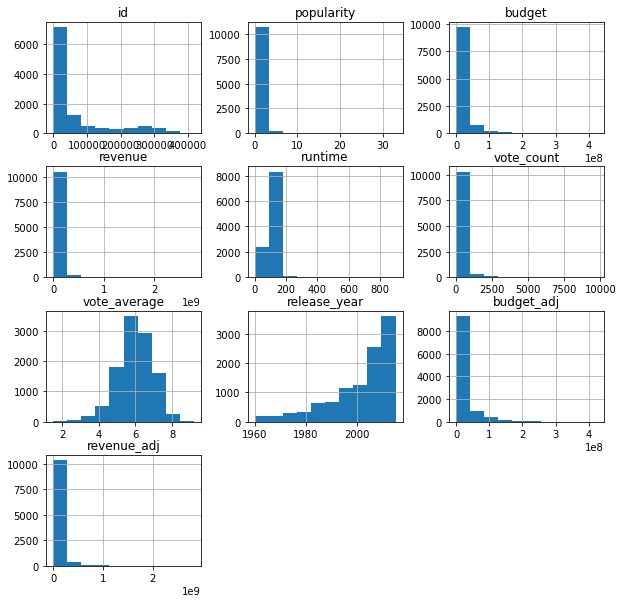

In [9]:
df.hist(figsize=(10,10));


### Data Cleaning 

We are going to clean our data now  
starting by dropping the columns we wont need

In [10]:
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','runtime',
          'production_companies','release_date','revenue','budget'],axis = 1, inplace = True)
# we dropped budget and revenue as we will be using revnue_adj and budget_adj

In [11]:
df.isnull().sum()

popularity       0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

We see there are only 23 missing values we can easily drop them as they wont effect the results as much

In [12]:
df.dropna(inplace=True)

In [13]:
df= df.reset_index(drop=True) #reset the index to proper one after dropping rows

In [14]:
#our new df after cleaning
df.head()

,popularity,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


We now have a problem with the column genres as we need every genre to be accessible to preform the desired analysis on it.   
as we see each movie have more than one genre our goal is to create a dataframe for each genre and the movies can be in more than one genre dataframe

In [15]:
#we will make a copy of our dataframe to work on it
df_g = df.copy()

In [16]:
df_g['genres'] = df_g['genres'].apply(lambda x:x.split('|')) #make the genres as list

In [17]:
df_g

,popularity,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...
10837,0.080598,[Documentary],11,7.4,1966,0.000000e+00,0.000000e+00
10838,0.065543,"[Action, Adventure, Drama]",20,5.7,1966,0.000000e+00,0.000000e+00
10839,0.065141,"[Mystery, Comedy]",11,6.5,1966,0.000000e+00,0.000000e+00
10840,0.064317,"[Action, Comedy]",22,5.4,1966,0.000000e+00,0.000000e+00


In [18]:
genre_df =  pd.DataFrame(df_g['genres'].to_list(),columns=['genre_1','genre_2','genre_3','genre_4','genre_5']) 

In [19]:
genre_df.head()

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [20]:
df_g = pd.merge(df_g, genre_df, left_index=True, right_index=True)
df_g

,popularity,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,"[Action, Crime, Thriller]",2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
10837,0.080598,[Documentary],11,7.4,1966,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
10838,0.065543,"[Action, Adventure, Drama]",20,5.7,1966,0.000000e+00,0.000000e+00,Action,Adventure,Drama,None,None
10839,0.065141,"[Mystery, Comedy]",11,6.5,1966,0.000000e+00,0.000000e+00,Mystery,Comedy,None,None,None
10840,0.064317,"[Action, Comedy]",22,5.4,1966,0.000000e+00,0.000000e+00,Action,Comedy,None,None,None


Now we have our dataframe with each movie and its genres as columns   
we want now to know what are the genres that we have

In [21]:
g1 = df_g['genre_1'].unique() 
g1 = set(g1)
g2 = df_g['genre_2'].unique() 
g2 = set(g2)
g3 = df_g['genre_3'].unique() 
g3 = set(g3)
g4 = df_g['genre_4'].unique() 
g4 = set(g4)
g5 = df_g['genre_5'].unique() 
g5 = set(g5)
total_g = g1.union(g2,g3,g4,g5)
total_g.remove(None)
# we get the uniqe values from each column and then union between them all and remove none values 

In [22]:
total_g = list(total_g)
total_g.sort() #sort the valuues alphabitical

In [23]:
total_g = np.array(total_g)

In [24]:
total_g

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

Now we will create a function that we will give it the name of genre and it creates a dataframe of all movies with this genre

In [25]:
def create_by_genre(genre):
    """Create a newdata set of only one genre depinding in df_g dataframe
    takes the genre name as the only parameter
     """
    new = pd.DataFrame()
    genres_columns = ['genre_1','genre_2','genre_3','genre_4','genre_5']
    for i in genres_columns:
        new = new.append(df_g.query(' {} == "{}"'.format(i,genre)))
    # We dont need any of genre columns as we already know the genre of all dataset
    new.drop(['genres','genre_1','genre_2','genre_3','genre_4','genre_5'],axis=1,inplace=True)
    return new
    

In [26]:
#creating dataframe for each genre
adventure = create_by_genre('Adventure')
crime = create_by_genre('Crime')
animation = create_by_genre('Animation')
comedy = create_by_genre('Comedy')
thriller = create_by_genre('Thriller')
western = create_by_genre('Western')
mystery = create_by_genre('Mystery')
action = create_by_genre('Action')
history = create_by_genre('History')
documentary = create_by_genre('Documentary')
war = create_by_genre('War')
science_fiction = create_by_genre('Science Fiction')
drama = create_by_genre('Drama')
tv_movie = create_by_genre('TV Movie')
foreign = create_by_genre('Foreign')
family = create_by_genre('Family')
romance = create_by_genre('Romance')
fantasy = create_by_genre('Fantasy')
music = create_by_genre('Music')
horror = create_by_genre('Horror')

In [27]:
genres_names = [action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,foreign
                ,history,horror,music,mystery,
               romance,science_fiction,tv_movie,thriller,war,western]

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What are the genres that are most popular over the years?

Before I start digging in to answer this question I want to define the meaning of popular  
I mean by popular the most genre movies that been produced in every year

In [28]:
count_df = pd.DataFrame() # I will create a dataframe that contains the genre and count for every year 
for i,y in zip(genres_names,total_g):
    x = i['release_year'].value_counts()
    x.rename('{}'.format(y),inplace=True)
    count_df = count_df.append(x)
count_df.index.name = 'year'


In [29]:
count_df.head(1) #we need to transpose it

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
year,,,,,,,,,,,,,,,,,,,,,
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,...,80.0,95.0,99.0,108.0,107.0,115.0,99.0,121.0,129.0,107.0


In [30]:
count_df = count_df.transpose()

In [31]:
count_df.head(2)

year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0


In [32]:
pop_genre = count_df.idxmax(axis=1)
pop_genre.head() #the most produced genre every year

1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
dtype: object

In [33]:
pop_genre.value_counts()

Drama     46
Comedy    10
dtype: int64

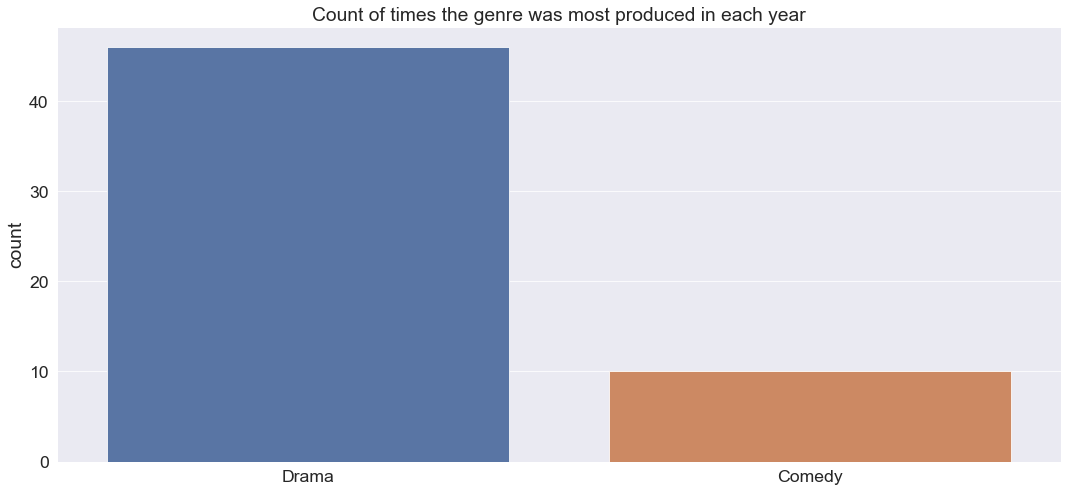

In [34]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,8)})
sns.set_context('paper',font_scale=2)

sns.countplot(x=pop_genre).set(title='Count of times the genre was most produced in each year');

Its obvious that the Drama genre is the most popular over the years followed by the comedy but we can see the big diffrence between them. 

### Research Question 2 : Which movie genre is most profitable ?

We will need to view the sum of revenue and budget of each genre and make the diffrence between them

In [35]:
budget = []

In [36]:
for i in genres_names:
    x = i['budget_adj'].sum()
    budget.append(x)
#collecting budget sum for each genre

In [37]:
budget = pd.DataFrame(budget)

In [38]:
budget['genre']=total_g
budget.rename(columns={0:'budget'},inplace=True)

In [39]:
budget.head(5)

,budget,genre
0,7.857690e+10,Action
1,6.463182e+10,Adventure
2,1.768145e+10,Animation
3,6.038575e+10,Comedy
4,2.915638e+10,Crime


In [40]:
#lets sort budget descnding
budget = budget.sort_values('budget',ascending=False)

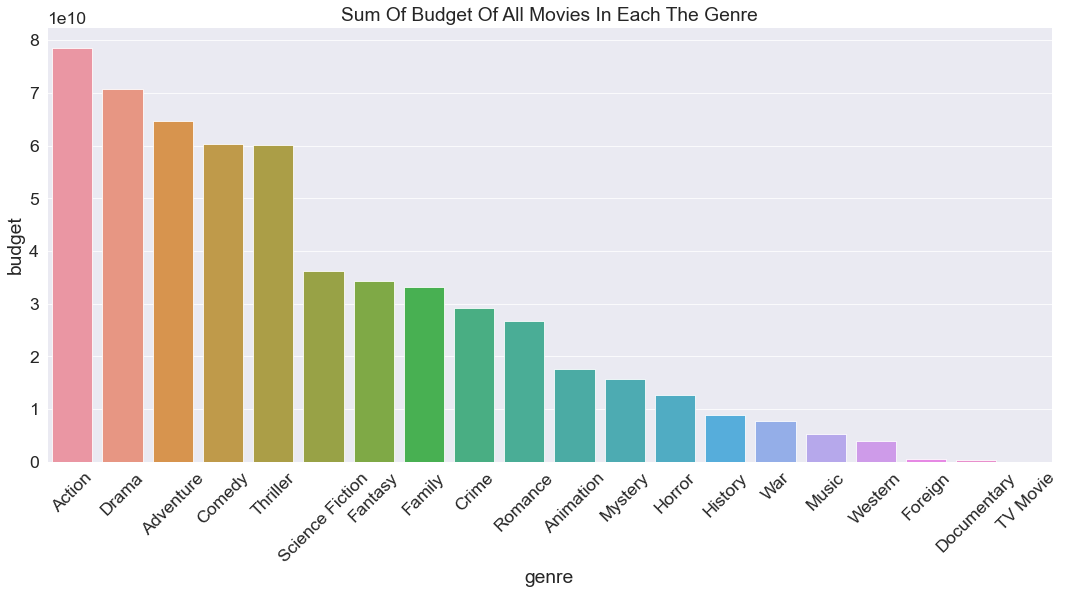

In [41]:
sns.barplot(x='genre',y='budget',data=budget)
plt.xticks(rotation=45);
plt.title('Sum Of Budget Of All Movies In Each The Genre');

Lets invistigate the revenue for each genre now

In [42]:
revenue = []
for i in genres_names:
    x = i['revenue_adj'].sum()
    revenue.append(x)
revenue = pd.DataFrame(revenue)

In [43]:
revenue.rename(columns={0:'revenue'},inplace=True)

In [44]:
revenue['genre'] = total_g

In [45]:
revenue = revenue.sort_values('revenue',ascending=False)

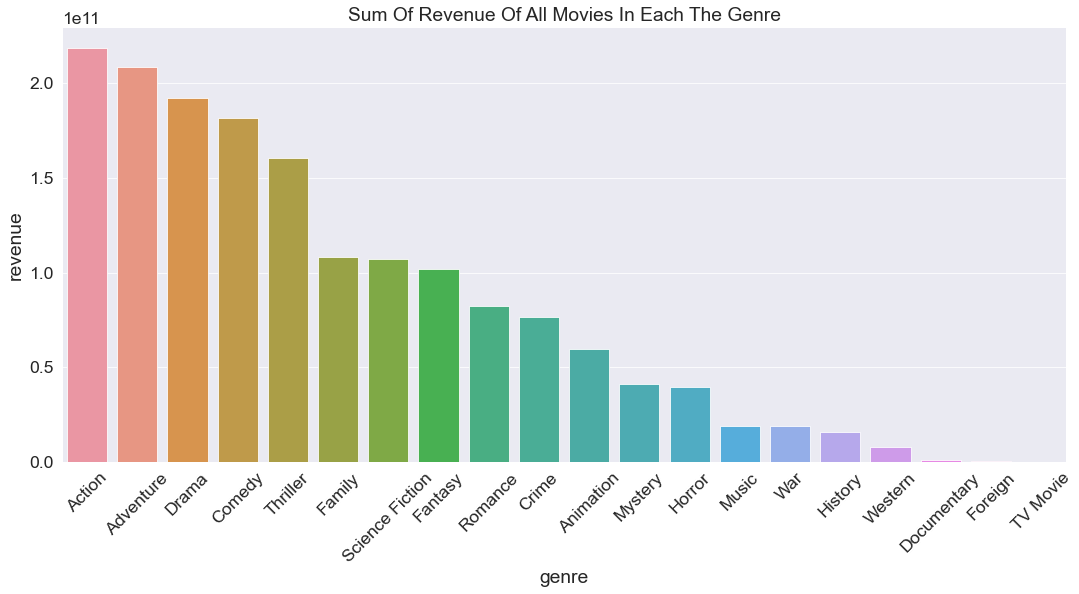

In [46]:
sns.barplot(x='genre',y='revenue',data=revenue)
plt.title('Sum Of Revenue Of All Movies In Each The Genre')
plt.xticks(rotation=45);

Action genre collects the highest revenue but it also have the highest budget   
lets see the profits for each genre now

We will merge both budget and revenue in one dataframe called merged

In [47]:
merged = pd.merge(revenue,budget)

In [48]:
#add profit column
merged['profit'] = merged['revenue'] - merged['budget']

In [49]:
#sort by the highest profit
merged = merged.sort_values('profit',ascending=False)

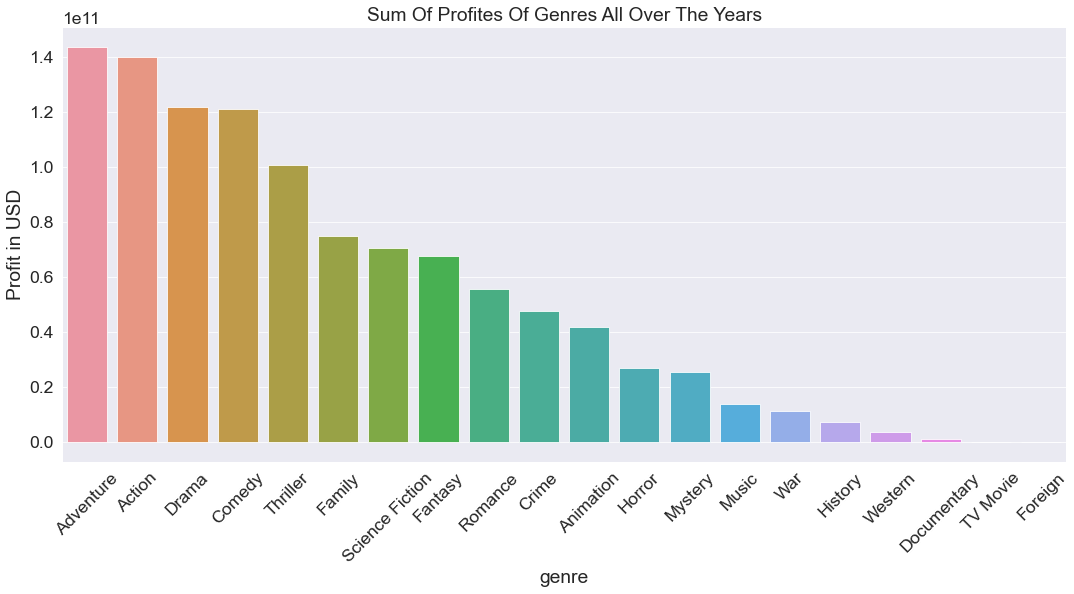

In [50]:
sns.barplot(x='genre',y='profit',data = merged)
plt.ylabel('Profit in USD')
plt.title('Sum Of Profites Of Genres All Over The Years')
plt.xticks(rotation=45);

We can see now that the most profitable genre is Adventure and the least one is Foreign

### Research Question 3 : What is the relation between budget and popularity?

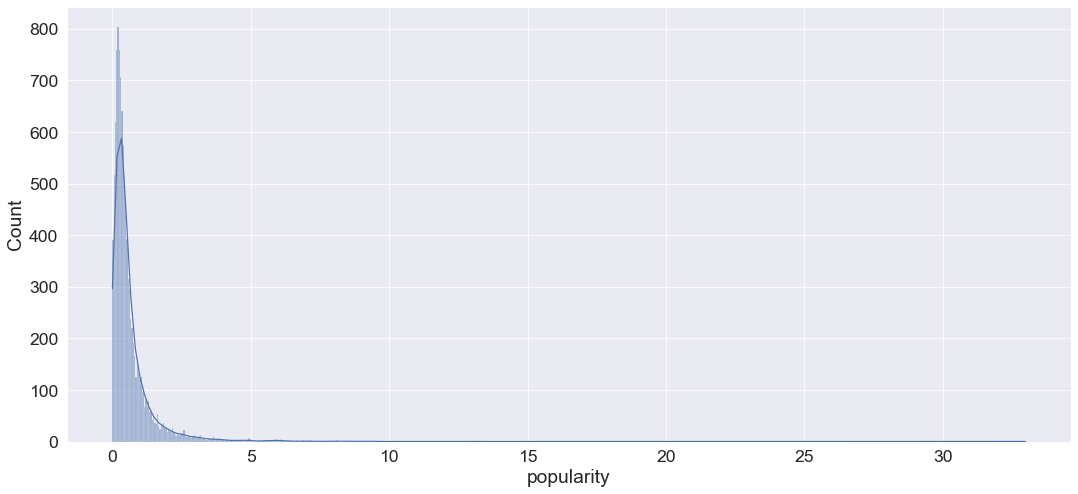

In [51]:
sns.histplot(df['popularity'],kde=True);

We can see the popularity is very skewed to right

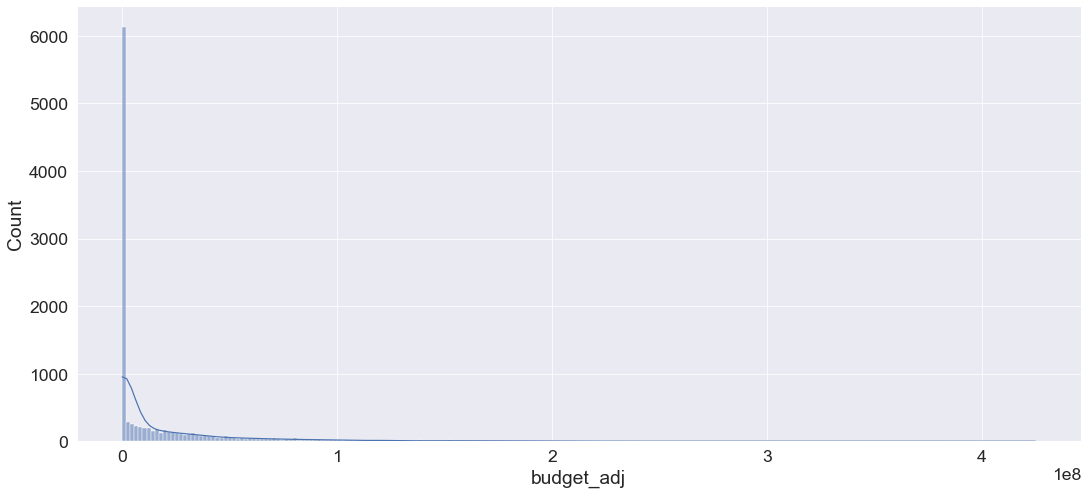

In [52]:
sns.histplot(df['budget_adj'],kde=True);

Also budget is very skewed to right only small portion that have high budget

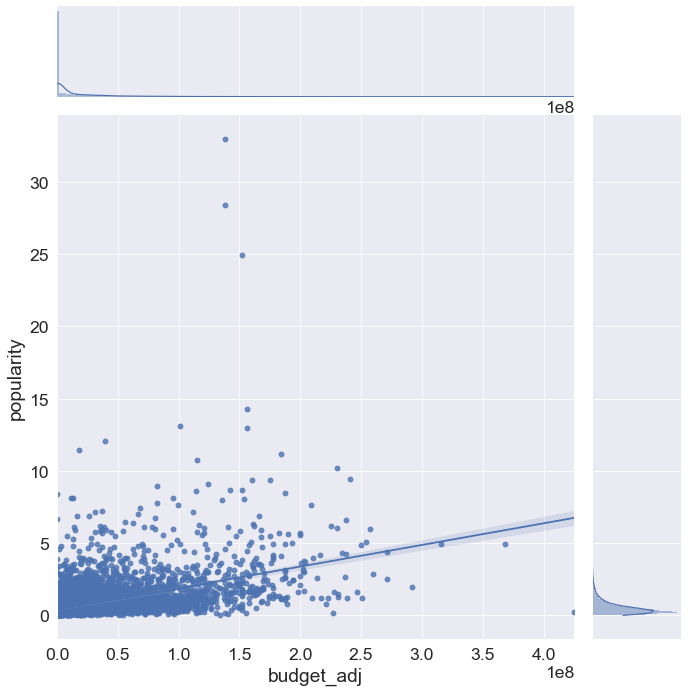

In [53]:
sns.set_style('darkgrid')
sns.set_context('paper',font_scale=2)
sns.jointplot(x='budget_adj',y='popularity',data = df,kind='reg',height=10 );


We can see that there is a postive correlation between budget and popularity  
note that the absolute most popular movies dont have the highest budget.

### Research Question 4: Is vote count and vote average related?

Lets check the distribution of each one first.

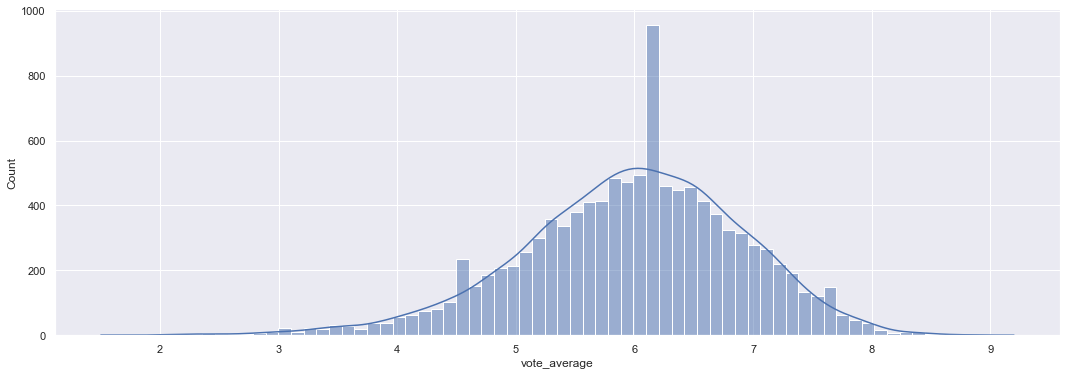

In [54]:
sns.set(rc={'figure.figsize':(18,6)})
sns.histplot(df['vote_average'],kde=True);

Vote average is slightly skewed to left and like symtric about 6

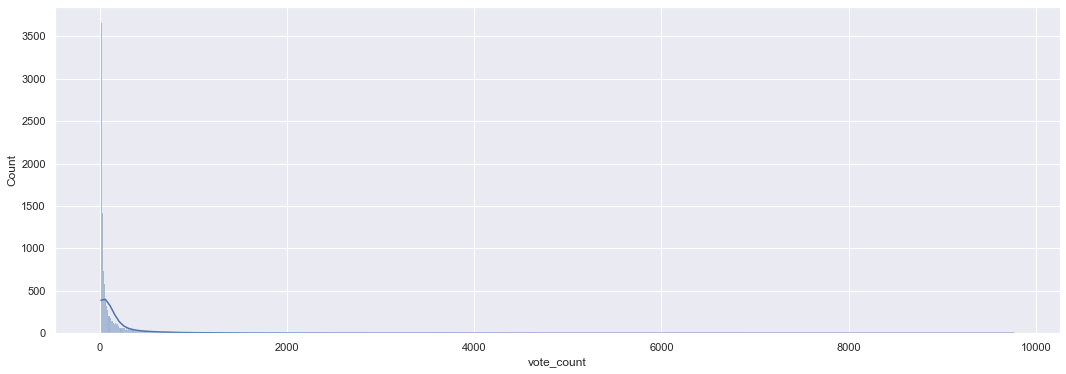

In [55]:
sns.histplot(df['vote_count'],kde=True);

cote count is skewedd heavily to right

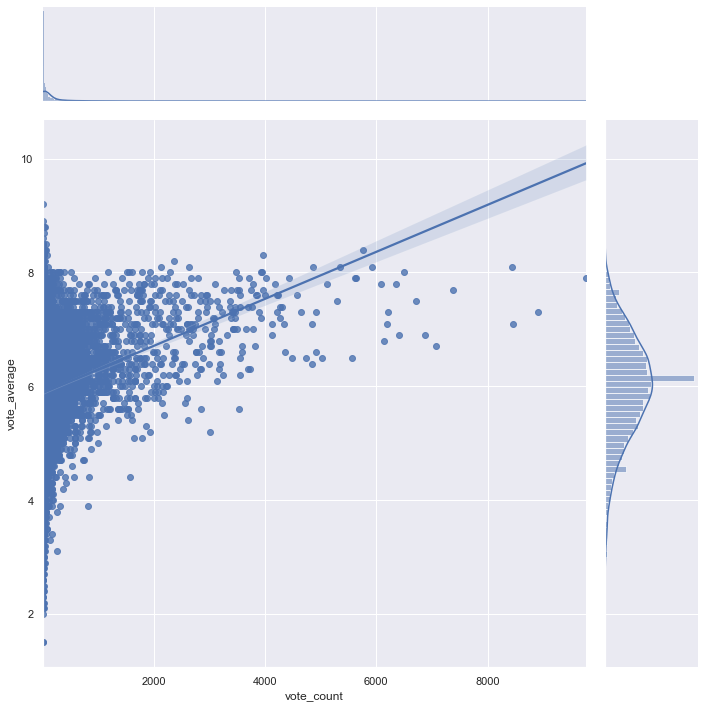

In [56]:
sns.jointplot(x='vote_count',y='vote_average',data = df ,kind='reg',height=10);

We can see there is a relation between them as well as there is a postive correlation.

### Research Question 5: How budget affect rating?

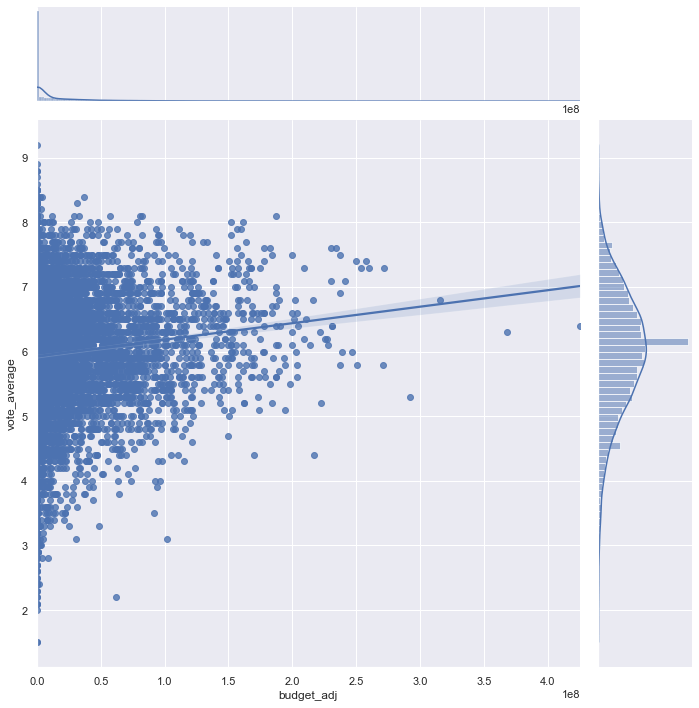

In [57]:
sns.jointplot(x='budget_adj',y='vote_average',data = df,kind='reg',height=10 );

we can see that a higher budget have a slight correlation with a higher rating, but the absolute highest rated movies have lower budgets.

<a id='conclusions'></a>
## Conclusions

We have done analysis on TMDb to answer the following questions   
 1-What are the genres that are most popular over the years?  
 2-Which movie genre is most profitable ?  
 3-What is the relation between budget and popularity?  
 4-Is vote count and vote average related?  
 5-How budget affect rating?
   
For the first question,
we found that Drama genre is the most popular genre over the ages followed by comedy and as I mentioned before the popular is based on the most produced from each year.   
For the second queston,
we found that the most profitable genre is Adventure by taking the sum of revenue minus the sum of budget and the is a **limitation** here as almost half of revenue and budget values are missing  
In the third question, 
We can see that there is a postive correlation between budget and popularity
**But** the absolute most popular movies dont have the highest budget also we have the same **limitation** menioned above.  
In the fourth question,
We can see clearly that the higher the rating the higher the vote counts and its logic as when more people like a movie a more will come to see it and therefore rate it.  
You can see that above 4000 thousand votes there is no movie rated below 6.  
Finally the last question,we can see that a higher budget have a slight correlation with a higher rating, but the absolute highest rated movies have lower budgets.   
**More statistical analysis will need to be performed to prove anything.**   
There is a place for further invistigation by seeing how diffrent combinations of genres will have diffren proprties.  
Also by viewing a relation between popularity,rating and vote counts and by removing the high rated movies with low vote count.





<a id='Citations'></a>
## Citations
 seaborn tutorial:https://youtu.be/6GUZXDef2U0  
 pandas and numpy documntation   
 stackoverflow   
 
